# SLSim vs. SLACS Dinos and SLED lenses
Notebook by: Sofia Castillo and Mia LaMontagne

In this notebook, we compare SLSim generated lens parameters against real observed SLACS Dinos lenses (Sofia Castillo) as well as SLED lenses (Mia LaMontagne) and visualize them in corner plots. 

In [3]:
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from astropy.units import Quantity
from slsim.lens_pop import LensPop
from slsim.Plots.lens_plots import LensingPlots
import numpy as np
import corner
import slsim.Pipelines as pipelines
import slsim.Sources as sources
import slsim.Deflectors as deflectors
import slsim
from astropy import units as u
from astropy.constants import c
from astropy.cosmology import FlatLambdaCDM
from lenstronomy.Cosmo.lens_cosmo import LensCosmo

In [4]:
import warnings

warnings.filterwarnings("ignore")

## SLSim Vs. SLACS Dinos Lenses (Sofia Castillo) 

In [5]:
# define a cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Large sky area for deflectors (lens galaxies)
sky_area_lens = Quantity(0.5, unit="deg2")

# Smaller sky area for sources (source galaxies)
sky_area_source = Quantity(0.5, unit="deg2")

sky_area_pop = Quantity(20, unit="deg2")

# define limits in the intrinsic deflector and source population (in addition to the skypy config
# file)
kwargs_deflector_cut = {"band": "g", "band_max": 24, "z_min": 0.01, "z_max": 2}
kwargs_source_cut = {"band": "g", "band_max": 28, "z_min": 0.1, "z_max": 5.0}

In [6]:
# Use large sky area here for deflector population generation
galaxy_simulation_pipeline = pipelines.SkyPyPipeline(
    skypy_config=None, sky_area=sky_area_lens, filters=None, cosmo=cosmo
)

In [7]:
lens_galaxies = deflectors.AllLensGalaxies(
    red_galaxy_list=galaxy_simulation_pipeline.red_galaxies,
    blue_galaxy_list=galaxy_simulation_pipeline.blue_galaxies,
    kwargs_cut=kwargs_deflector_cut,
    kwargs_mass2light=None,
    cosmo=cosmo,
    sky_area=sky_area_lens,  # use large area here
)

In [8]:
# Initiate source population class.
source_galaxies = sources.Galaxies(
    galaxy_list=galaxy_simulation_pipeline.blue_galaxies,
    kwargs_cut=kwargs_source_cut,
    cosmo=cosmo,
    sky_area=sky_area_source,  #  use smaller area here
    catalog_type="skypy",
)

In [9]:
gg_lens_pop = LensPop(
    deflector_population=lens_galaxies,
    source_population=source_galaxies,
    cosmo=cosmo,
    sky_area=sky_area_pop,  # This sky_area is what’s used for simulated solid angle
)

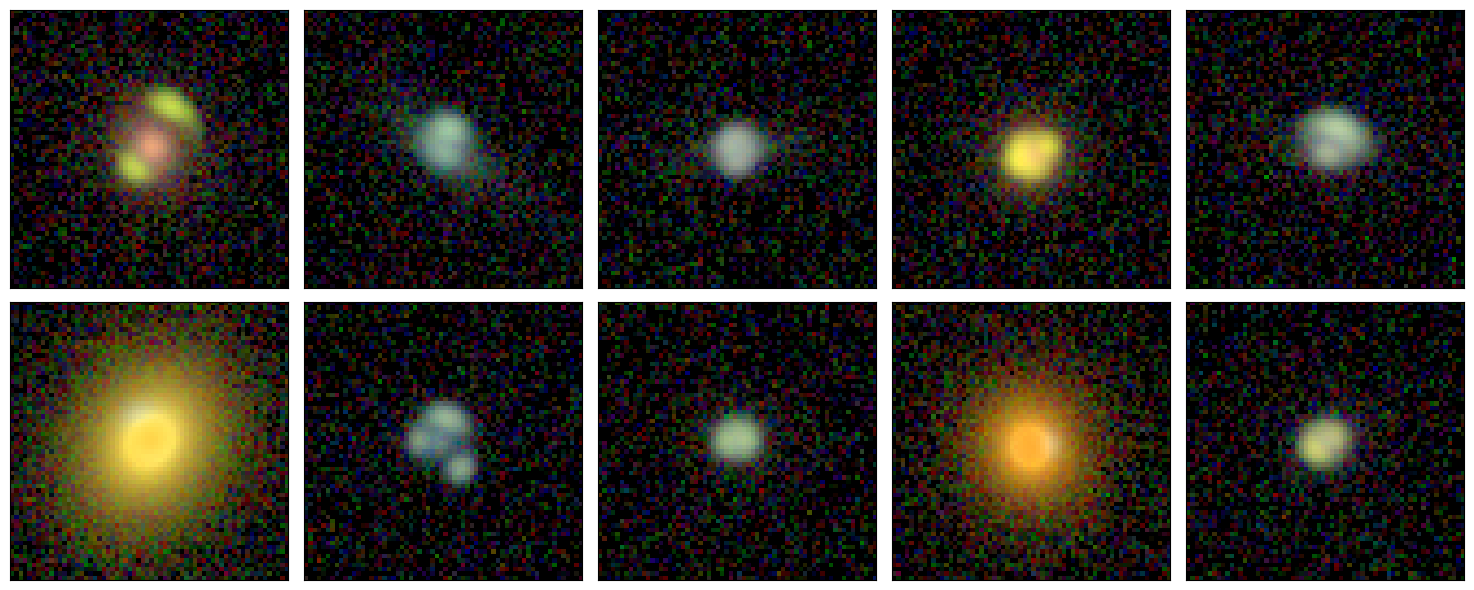

In [10]:
# make some cuts in the image separations and limited magnitudes of the arc
kwargs_lens_cut_plot = {
    "min_image_separation": 0.8,
    "max_image_separation": 10,
    "mag_arc_limit": {"g": 23, "r": 23, "i": 23},
}


gg_plot = LensingPlots(gg_lens_pop, num_pix=64, coadd_years=10)

# generate montage indicating which bands are used for the rgb color image
fig, axes = gg_plot.plot_montage(
    rgb_band_list=["i", "r", "g"],
    add_noise=True,
    n_horizont=5,
    n_vertical=2,
    kwargs_lens_cut=kwargs_lens_cut_plot,
)
plt.show()

In [11]:
# specifying cuts of the population
kwargs_lens_cuts = {"mag_arc_limit": {"g": 28}}
# drawing population
gg_lens_population = gg_lens_pop.draw_population(kwargs_lens_cuts=kwargs_lens_cuts)

In [12]:
# Importing Slacs Data
import pandas as pd

In [13]:
slacs_data = pd.read_csv("dinos1_lens_data.csv")

In [14]:
slacs_data.head()

,Lens system,Survey,theta_E,sig_theta_E_up,sig_theta_E_low,gamma,sig_gamma_up,sig_gamma_low,sig_gamma_sys,q_m,...,sig_R_eff_low,z_lens,z_source,sigma_los,sig_sigma_los,slit_shape,slit radius,slit_width,slit_length,seeing
0,NaN,NaN,(arcsec),(arcsec),(arcsec),NaN,NaN,NaN,NaN,NaN,...,(arcsec),NaN,NaN,(km /s),(km /s),NaN,(arcsec),(arcsec),(arcsec),(arcsec)
1,SDSSJ0008-0004,SLACS,1.225,0.008,0.009,1.75,0.14,0.12,0.33,0.60,...,0.025,0.44,1.19,227,27,Circular,1.5,--,--,1.4
2,SDSSJ0029-0055,SLACS,0.945,0.003,0.003,2.69,0.04,0.05,0.25,0.66,...,0.005,0.23,0.93,215,14,Circular,1.5,--,--,1.4
3,SDSSJ0037-0942,SLACS,1.476,0.010,0.007,2.38,0.02,0.02,0.11,0.73,...,0.047,0.20,0.63,264,7,Circular,1.5,--,--,1.4
4,SDSSJ0252+0039,SLACS,1.028,0.001,0.001,1.55,0.04,0.03,0.12,0.89,...,0.005,0.28,0.98,193,9,Circular,1.5,--,--,1.4


In [15]:
slacs_data = pd.read_csv("dinos1_lens_data.csv")

In [16]:
print(slacs_data.columns.tolist())

['Lens system', 'Survey', 'theta_E', 'sig_theta_E_up', 'sig_theta_E_low', 'gamma', 'sig_gamma_up', 'sig_gamma_low', 'sig_gamma_sys', 'q_m', 'sig_q_m_up', 'sig_q_m_low', 'phi_m', 'sig_phi_m_up', 'sig_phi_m_low', 'gamma_shear', 'sig_gamma_shear_up', 'sig_gamma_shear_low', 'phi_shear', 'sig_phi_shear_hi', 'sig_phi_shear_low', 'q_L', 'sig_q_L_up', 'sig_q_L_low', 'phi_L', 'sig_phi_L_up', 'sig_phi_L_low', 'R_eff', 'sig_R_eff_up', 'sig_R_eff_low', 'z_lens', 'z_source', 'sigma_los', 'sig_sigma_los', 'slit_shape', 'slit radius', 'slit_width', 'slit_length', 'seeing']


In [17]:
# Coerce all relevant columns to numeric
cols = [
    "sigma_los",
    "theta_E",
    "gamma_shear",
    "z_lens",
    "z_source",
    "R_eff",
    "q_L",
    "q_m",
    "phi_L",
    "phi_m",
]

for col in cols:
    slacs_data[col] = pd.to_numeric(slacs_data[col], errors="coerce")

# Now safely create Δphi
slacs_data["delta_phi"] = slacs_data["phi_L"] - slacs_data["phi_m"]

In [18]:
import numpy as np


def ellipticity_to_q_pa(e1, e2):
    """Convert ellipticity components (e1, e2) to axis ratio q and position angle phi"""
    e = np.hypot(e1, e2)
    q = (1 - e) / (1 + e)
    phi = 0.5 * np.degrees(np.arctan2(e2, e1))
    return q, phi

In [19]:
lens_samples = []

for gg_lens in gg_lens_population:
    vel_disp = gg_lens.deflector_velocity_dispersion()
    theta_e = gg_lens.einstein_radius[0]
    shear = gg_lens.external_shear
    zl = gg_lens.deflector_redshift
    zs = gg_lens.source_redshift_list[0]
    r_eff = gg_lens.deflector.angular_size_light

    e1_l, e2_l = gg_lens.deflector.light_ellipticity
    q_light, phi_l = ellipticity_to_q_pa(e1_l, e2_l)

    e1_m, e2_m = gg_lens.deflector.mass_ellipticity
    q_mass, phi_m = ellipticity_to_q_pa(e1_m, e2_m)

    delta_phi = (phi_m - phi_l + 180) % 360 - 180

    lens_samples.append(
        [
            vel_disp,
            theta_e,
            shear,
            zl,
            zs,
            r_eff,
            q_light,
            q_mass,
            phi_l,
            phi_m,
            delta_phi,
        ]
    )

In [20]:
# Fix dtype issues
slacs_data["phi_L"] = pd.to_numeric(slacs_data["phi_L"], errors="coerce")
slacs_data["phi_m"] = pd.to_numeric(slacs_data["phi_m"], errors="coerce")

# Now construct dinos1_samples
dinos1_samples = np.array(
    [
        slacs_data["sigma_los"],
        slacs_data["theta_E"],
        slacs_data["gamma_shear"],
        slacs_data["z_lens"],
        slacs_data["z_source"],
        slacs_data["R_eff"],
        slacs_data["q_L"],
        slacs_data["q_m"],
        slacs_data["phi_L"],
        slacs_data["phi_m"],
        slacs_data["phi_L"] - slacs_data["phi_m"],
    ]
).T

In [21]:
print("lens_samples shape:", np.array(lens_samples).shape)
print("dinos1_samples shape:", np.array(dinos1_samples).shape)

lens_samples shape: (3266, 11)
dinos1_samples shape: (78, 11)


In [22]:
# Remove NaNs from both samples to prevent corner crashes
lens_samples = np.array(lens_samples, dtype=float)
dinos1_samples = np.array(dinos1_samples, dtype=float)

# Drop rows with any NaNs
lens_samples = lens_samples[~np.isnan(lens_samples).any(axis=1)]
dinos1_samples = dinos1_samples[~np.isnan(dinos1_samples).any(axis=1)]


# Optional: also remove rows with no variation (identical values)
def has_range(row):
    return np.ptp(row) > 0  # ptp = max - min


lens_samples = np.array([row for row in lens_samples if has_range(row)])
dinos1_samples = np.array([row for row in dinos1_samples if has_range(row)])

Final lens sample shape: (3266, 11)
Final dinos1 sample shape: (68, 11)


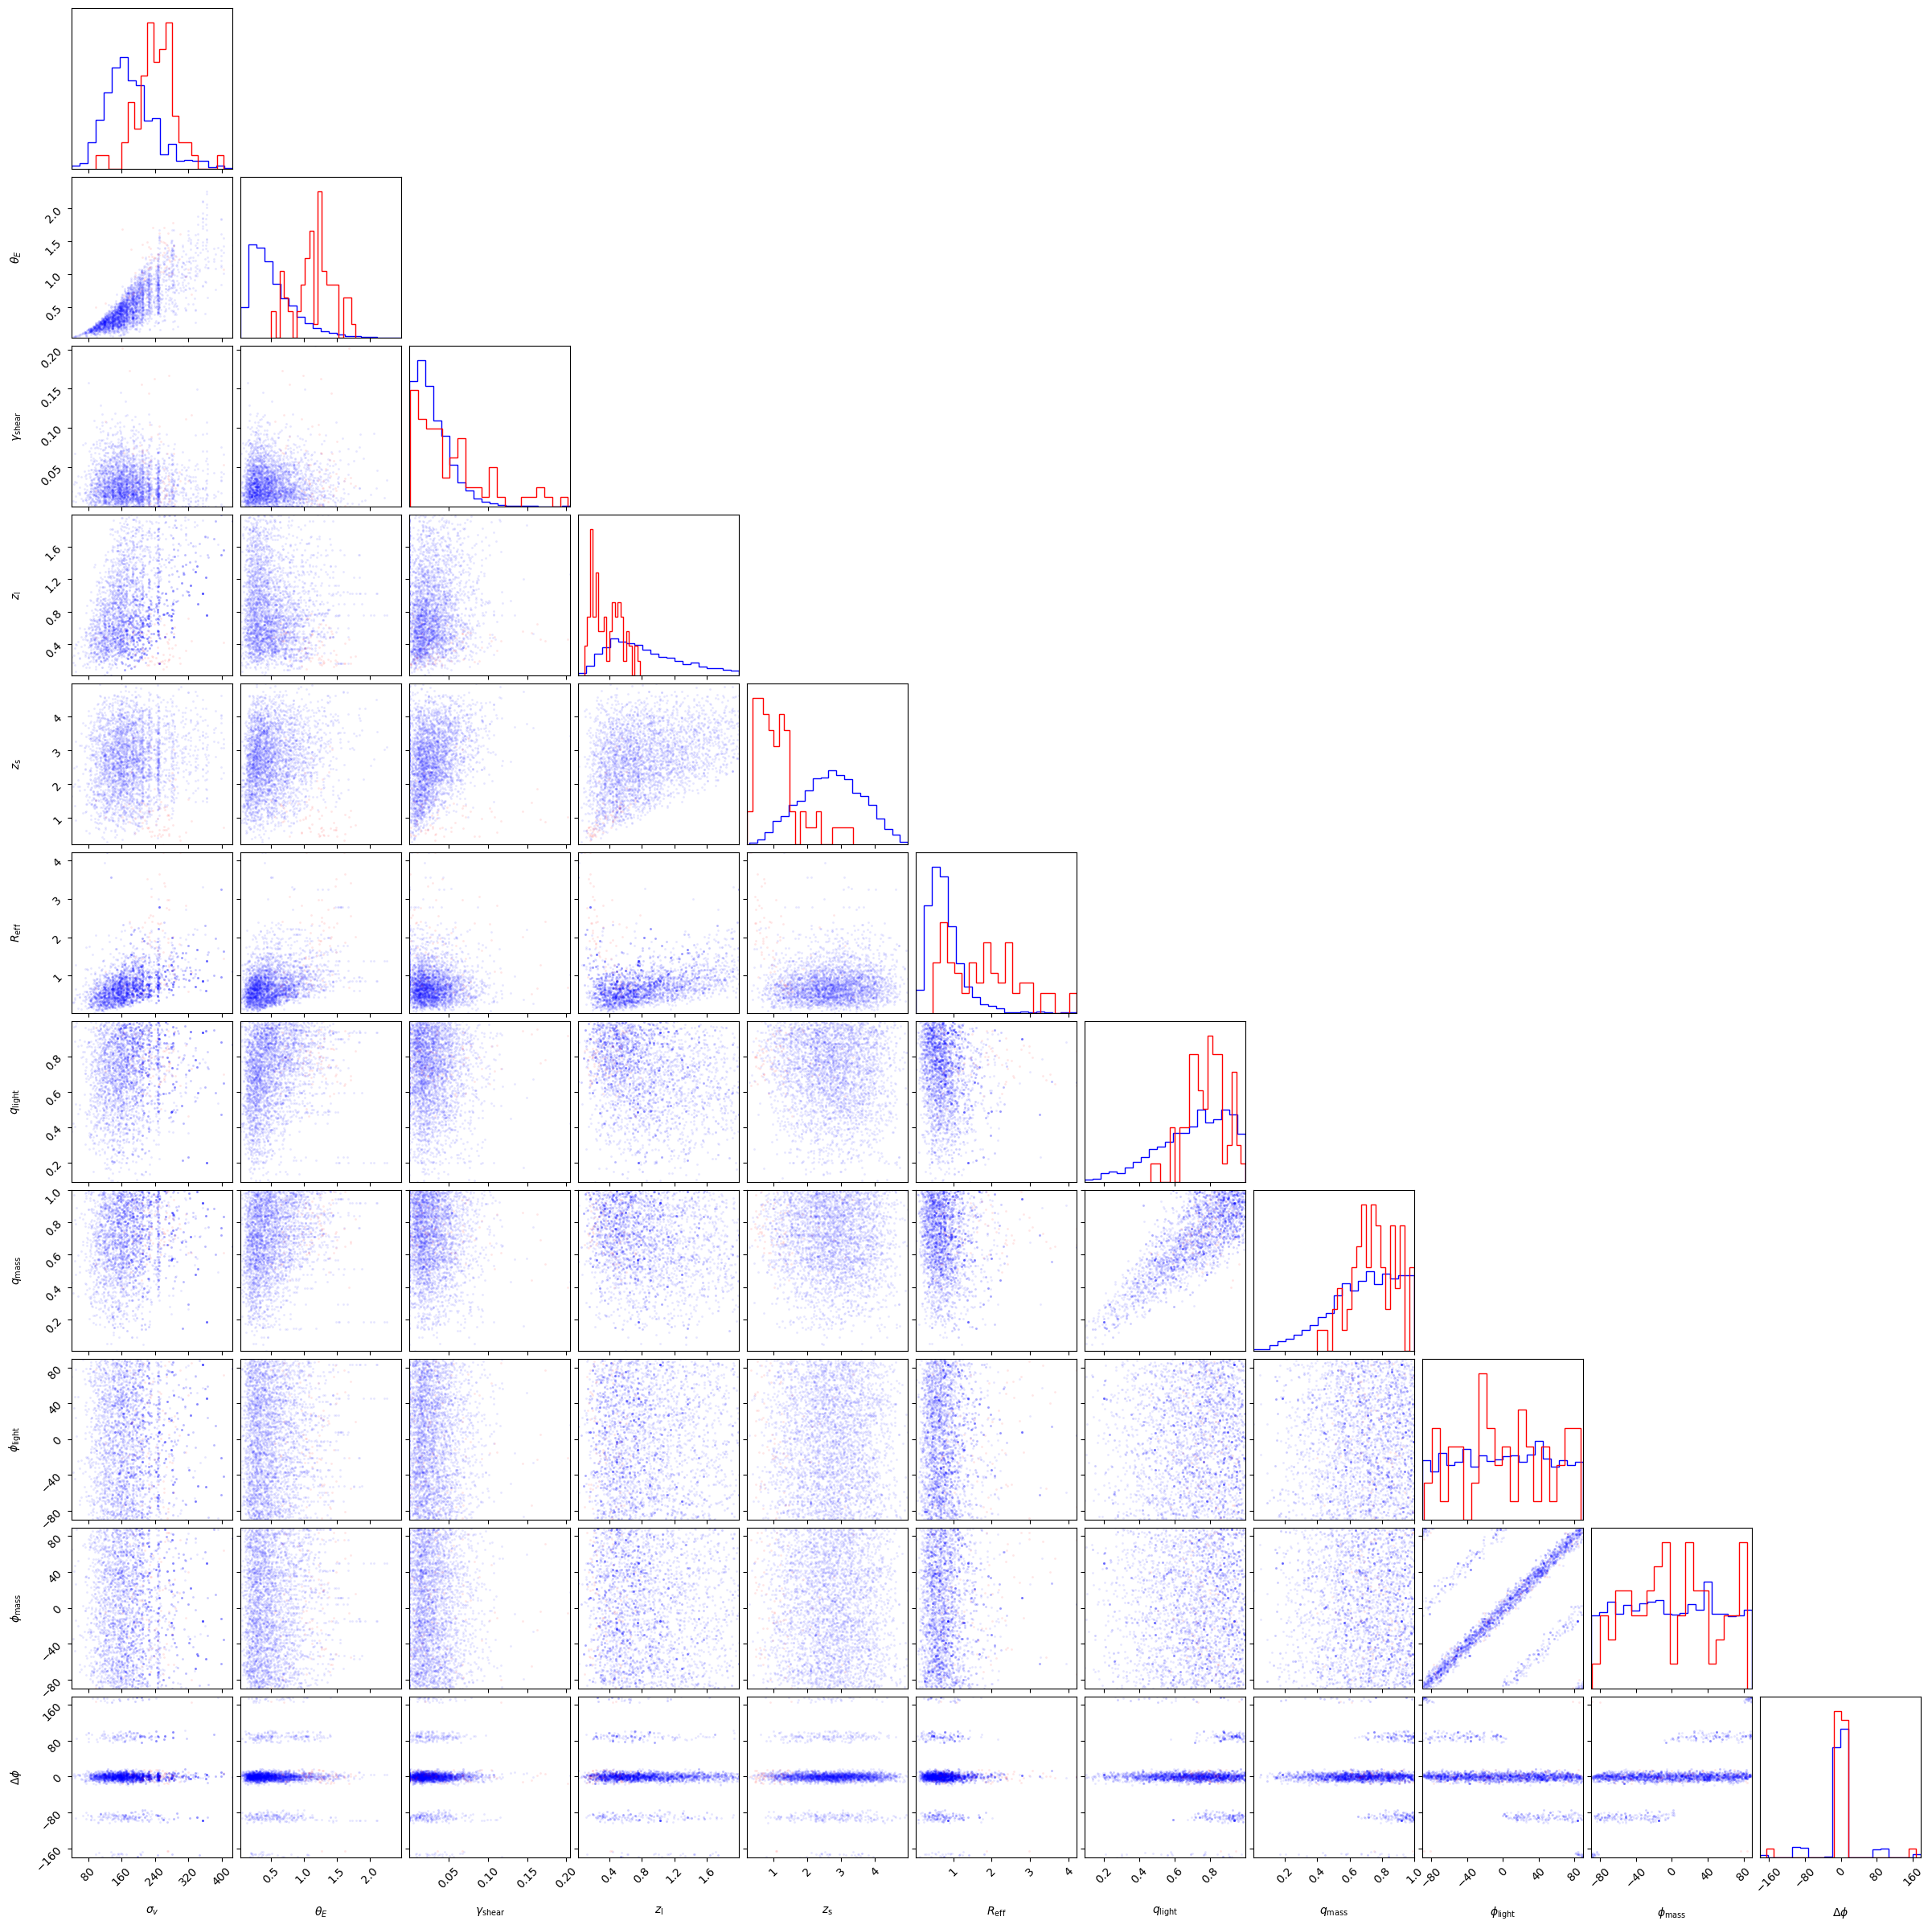

In [23]:
# --- Ensure samples are numeric and remove rows with NaNs ---
lens_samples = np.array(lens_samples, dtype=float)

# Convert slacs_data columns to numeric again just to be safe
cols = [
    "sigma_los",
    "theta_E",
    "gamma_shear",
    "z_lens",
    "z_source",
    "R_eff",
    "q_L",
    "q_m",
    "phi_L",
    "phi_m",
]

for col in cols:
    slacs_data[col] = pd.to_numeric(slacs_data[col], errors="coerce")

# Recompute delta_phi
slacs_data["delta_phi"] = slacs_data["phi_L"] - slacs_data["phi_m"]

# Build dinos1_samples
dinos1_samples = np.array(
    [
        slacs_data["sigma_los"],
        slacs_data["theta_E"],
        slacs_data["gamma_shear"],
        slacs_data["z_lens"],
        slacs_data["z_source"],
        slacs_data["R_eff"],
        slacs_data["q_L"],
        slacs_data["q_m"],
        slacs_data["phi_L"],
        slacs_data["phi_m"],
        slacs_data["delta_phi"],
    ]
).T

# Remove NaNs from both samples
lens_samples = lens_samples[~np.isnan(lens_samples).any(axis=1)]
dinos1_samples = dinos1_samples[~np.isnan(dinos1_samples).any(axis=1)]

# --- Final check ---
print("Final lens sample shape:", lens_samples.shape)
print("Final dinos1 sample shape:", dinos1_samples.shape)

# --- Define labels ---
labels = [
    r"$\sigma_v$",
    r"$\theta_E$",
    r"$\gamma_{\rm shear}$",
    r"$z_{\rm l}$",
    r"$z_{\rm s}$",
    r"$R_{\rm eff}$",
    r"$q_{\rm light}$",
    r"$q_{\rm mass}$",
    r"$\phi_{\rm light}$",
    r"$\phi_{\rm mass}$",
    r"$\Delta \phi$",
]

# --- Generate corner plot ---
import matplotlib.pyplot as plt
import corner

fig = corner.corner(
    lens_samples,
    labels=labels,
    color="blue",
    plot_datapoints=True,
    plot_density=False,
    fill_contours=False,
    plot_contours=False,
    hist_kwargs={"density": True},
    scatter_kwargs={"s": 10, "alpha": 0.6},
)

corner.corner(
    dinos1_samples,
    fig=fig,
    color="red",
    plot_datapoints=True,
    plot_density=False,
    fill_contours=False,
    plot_contours=False,
    hist_kwargs={"density": True},
    scatter_kwargs={"s": 14, "alpha": 0.6},
)

# --- Save and show ---
plt.savefig("dinos1_slsim_full_corner_plot.png", dpi=300, bbox_inches="tight")
plt.show()

In [24]:
# Plot w/ AB Magnitudes
import pandas as pd

light_df = pd.read_csv("SLACS_light_params.csv")
print(slacs_light_df.head())
print(slacs_light_df.columns)

NameError: name 'slacs_light_df' is not defined

In [ ]:
def compute_ab_mag_from_row(row, photflam, photzpt, photplam):
    import numpy as np
    import scipy.special as sp

    total_flux = 0

    for idx in [1, 2]:  # loop over sersic_1 and sersic_2
        try:
            amp = float(row[f"amp_sersic_{idx}"])
            r_eff = float(row[f"r_sersic_{idx}"])
            n = float(row[f"n_sersic_{idx}"])
            q = 1.0  # Assume q=1 for simplicity unless axis ratio is available

            if np.isnan(amp) or np.isnan(r_eff) or np.isnan(n):
                continue

            b = 2 * n - 1 / 3
            flux = (
                amp
                * (r_eff**2)
                * 2
                * np.pi
                * q
                * n
                * (np.exp(b) / (b ** (2 * n)))
                * sp.gamma(2 * n)
            )
            total_flux += flux
        except:
            continue

    # Now compute AB mag
    if total_flux == 0:
        return np.nan

    flux = total_flux * photflam
    stmag = -2.5 * np.log10(flux) + photzpt
    abmag = stmag - 5.0 * np.log10(photplam) + 2.5 * np.log10(299792458e10) - 27.5

    return abmag

In [ ]:
import pandas as pd

slacs_data = pd.read_csv("dinos1_lens_data.csv")

In [ ]:
dinos1_samples = []

for i in range(len(slacs_data)):
    try:
        name = slacs_data.loc[i, "Lens system"]
        light_row = light_df[light_df["lens_name"] == name]
        if light_row.empty:
            print(f"No light profile for {name}")
            continue

        light_row = light_row.iloc[0]

        vel_disp = float(slacs_data.loc[i, "sigma_los"])
        theta_e = float(slacs_data.loc[i, "theta_E"])
        shear = float(slacs_data.loc[i, "gamma_shear"])
        zl = float(slacs_data.loc[i, "z_lens"])
        zs = float(slacs_data.loc[i, "z_source"])
        r_eff = float(slacs_data.loc[i, "R_eff"])
        q_light = float(slacs_data.loc[i, "q_L"])
        phi_l = float(slacs_data.loc[i, "phi_L"])
        q_mass = float(slacs_data.loc[i, "q_m"])
        phi_m = float(slacs_data.loc[i, "phi_m"])

        delta_phi = (phi_m - phi_l + 180) % 360 - 180

        # AB mag constants
        photflam = 1.50532e-19
        photzpt = -21.1
        photplam = 8045.0

        mag = compute_ab_mag_from_row(light_row, photflam, photzpt, photplam)

        dinos1_samples.append(
            [
                vel_disp,
                theta_e,
                shear,
                zl,
                zs,
                r_eff,
                q_light,
                q_mass,
                phi_l,
                phi_m,
                delta_phi,
                mag,
            ]
        )

    except Exception as e:
        print(f"Row {i} failed: {e}")

In [ ]:
# Extend lens_samples with arc magnitude
lens_samples_full = []

for i, gg_lens in enumerate(gg_lens_population):
    try:
        mag_source = gg_lens.extended_source_magnitude(band="g", lensed=True)
        if isinstance(mag_source, list):
            mag_source = mag_source[0]

        lens_row = lens_samples[i]
        lens_samples_full.append(lens_row + [mag_source])
    except Exception as e:
        print(f"Skipping lens {i} due to: {e}")

In [ ]:
import numpy as np

lens_samples_full = np.array(lens_samples_full, dtype=float)
dinos1_samples = np.array(dinos1_samples, dtype=float)

# Remove NaNs
lens_samples_full = lens_samples_full[~np.isnan(lens_samples_full).any(axis=1)]
dinos1_samples = dinos1_samples[~np.isnan(dinos1_samples).any(axis=1)]

print("Final lens sample shape:", lens_samples_full.shape)
print("Final dinos1 sample shape:", dinos1_samples.shape)

In [ ]:
labels_with_mag = [
    r"$\sigma_v$",
    r"$\theta_E$",
    r"$\gamma_{\rm shear}$",
    r"$z_{\rm l}$",
    r"$z_{\rm s}$",
    r"$R_{\rm eff}$",
    r"$q_{\rm light}$",
    r"$q_{\rm mass}$",
    r"$\phi_{\rm light}$",
    r"$\phi_{\rm mass}$",
    r"$\Delta \phi$",
    r"$m_{\rm arc}$",
]

In [ ]:
print("lens_samples_full shape:", lens_samples_full.shape)
print("dinos1_samples shape:", dinos1_samples.shape)

In [ ]:
lens_samples_full = []

for i, gg_lens in enumerate(gg_lens_population):
    try:
        mag_source = gg_lens.extended_source_magnitude(band="g", lensed=True)
        if isinstance(mag_source, list):
            mag_source = mag_source[0]

        # Grab the 11 parameters from lens_samples
        lens_row = lens_samples[i]
        if len(lens_row) != 11:
            print(f"Skipping lens {i}: expected 11 values, got {len(lens_row)}")
            continue

        # Append magnitude as the 12th parameter
        lens_samples_full.append(list(lens_row) + [mag_source])

    except Exception as e:
        print(f"Skipping lens {i} due to: {e}")

# Convert to NumPy and clean
lens_samples_full = np.array(lens_samples_full, dtype=float)
lens_samples_full = lens_samples_full[~np.isnan(lens_samples_full).any(axis=1)]

print("lens_samples_full fixed. New shape:", lens_samples_full.shape)

In [ ]:
print("lens_samples_full shape:", lens_samples_full.shape)
print("dinos1_samples shape:", dinos1_samples.shape)

In [ ]:
import matplotlib.pyplot as plt
import corner
import numpy as np

# Convert to arrays if not already
lens_samples_full = np.array(lens_samples_full, dtype=float)
dinos1_samples = np.array(dinos1_samples, dtype=float)

# Filter out rows with any NaNs
lens_samples_full = lens_samples_full[~np.isnan(lens_samples_full).any(axis=1)]
dinos1_samples = dinos1_samples[~np.isnan(dinos1_samples).any(axis=1)]

# Labels including magnitude
labels_with_mag = [
    r"$\sigma_v$",
    r"$\theta_E$",
    r"$\gamma_{\rm shear}$",
    r"$z_{\rm l}$",
    r"$z_{\rm s}$",
    r"$R_{\rm eff}$",
    r"$q_{\rm light}$",
    r"$q_{\rm mass}$",
    r"$\phi_{\rm light}$",
    r"$\phi_{\rm mass}$",
    r"$\Delta \phi$",
    r"$m_{\rm arc}$",
]

# Step 1: Plot lens_samples_full (simulated)
fig = None
fig = corner.corner(
    lens_samples_full,
    labels=labels_with_mag,
    color="blue",
    plot_datapoints=True,
    plot_density=False,
    fill_contours=False,
    plot_contours=False,
    hist_kwargs={"density": True},
    scatter_kwargs={"s": 10, "alpha": 0.5},
)

# Step 2: Overlay dinos1_samples (observed)
corner.corner(
    dinos1_samples,
    labels=labels_with_mag,
    color="red",
    fig=fig,
    plot_datapoints=True,
    plot_density=False,
    fill_contours=False,
    plot_contours=False,
    hist_kwargs={"density": True},
    scatter_kwargs={"s": 14, "alpha": 0.6},
)

# Step 3: Save and display
plt.savefig("sim_vs_slacs_with_magnitude_corner_plot.png", dpi=300, bbox_inches="tight")
plt.show()

## SLSim vs. SLED Lenses (Mia LaMontagne)

Load a file of confirmed lenses downloaded from the SLED database

In [29]:
# Importing SLED Data
import json

with open("master.json", "r") as f:
    sled_list = json.load(f)

Extract relavent parameters from the SLED catalog and store them in an array. 

In [30]:
rows = []
for s in sled_list:
    # Extract SLED redshifts
    z_lens = next(
        (float(r["value"]) for r in s.get("redshift", []) if r["tag"] == "LENS"), np.nan
    )
    z_source = next(
        (float(r["value"]) for r in s.get("redshift", []) if r["tag"] == "SOURCE"),
        np.nan,
    )

    # Extract positional & separation info
    ra = float(s.get("ra") or np.nan)
    dec = float(s.get("dec") or np.nan)
    sep = float(s.get("image_sep") or np.nan)

    # Calcualte Einstein radius (not explicitly given)
    theta_E = sep / 2.0

    # Calculate velocity dispersion
    lens_cosmo = LensCosmo(z_lens=z_lens, z_source=z_source, cosmo=cosmo)
    sigma_v = lens_cosmo.sis_theta_E2sigma_v(theta_E=theta_E)

    rows.append([ra, dec, sep, theta_E, z_lens, z_source, sigma_v])

sled_array = np.array(rows)
print("sled_array shape:", sled_array.shape)

sled_array shape: (2880, 7)


Condition the SLED lenses to have the same redshift range and velocity dispersion as the SLACS Dinos lesnes, for comparision purposes. 

In [31]:
# Determine SLACS data redshift and velocity dispersion min and max
z_lens_min, z_lens_max = slacs_data["z_lens"].min(), slacs_data["z_lens"].max()
sigma_v_min, sigma_v_max = (
    slacs_data["sigma_los"][1:].min(),
    slacs_data["sigma_los"][1:].max(),
)

# Condition SLED redshift and velocity dispersion to match SLACS
mask = (
    (sled_array[:, 4] >= z_lens_min)
    & (sled_array[:, 4] <= z_lens_max)
    & (sled_array[:, 6] >= sigma_v_min)
    & (sled_array[:, 6] <= sigma_v_max)
)
filtered = sled_array[mask]

print(f"Total SLED systems:    {sled_array.shape[0]}")
print(f"Filtered SLED systems: {filtered.shape[0]}")

Total SLED systems:    2880
Filtered SLED systems: 381


Finally, generate a corner plot comparing the SLSim and SLED samples.

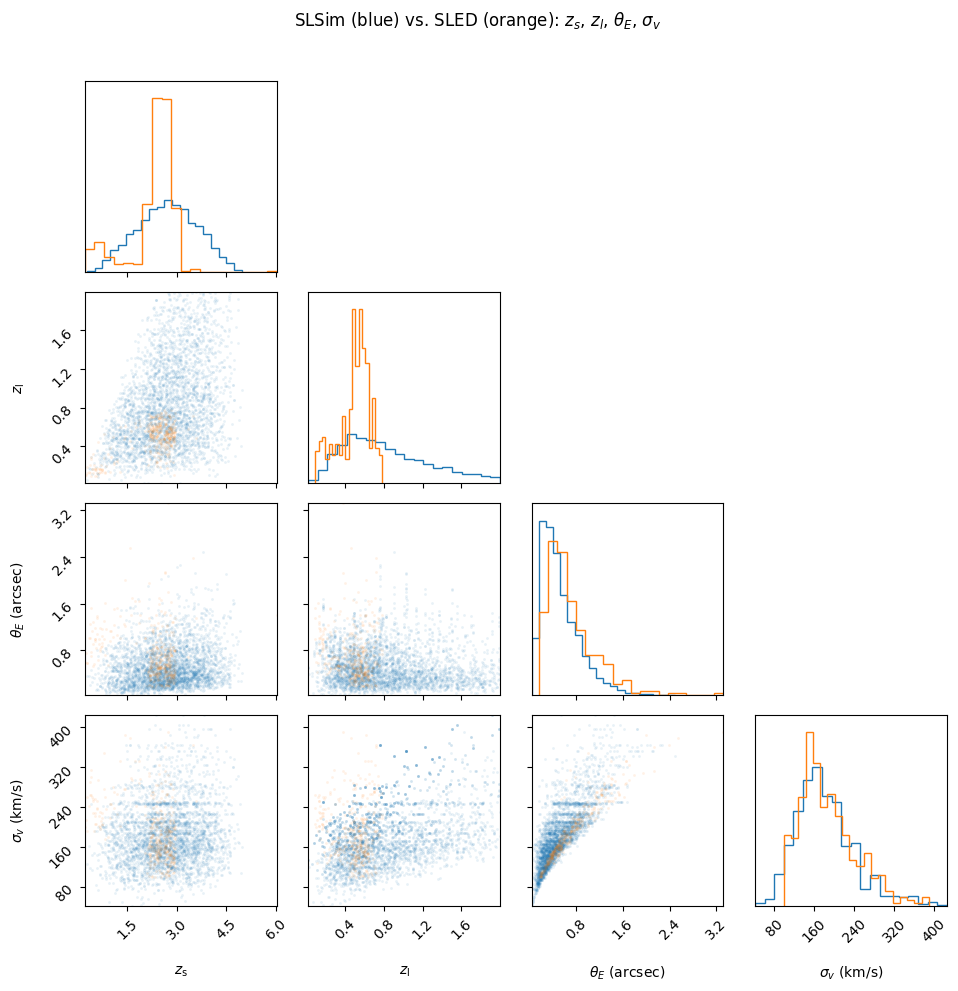

In [28]:
# Corner plot of SLSim vs. filtered SLED sample
import corner
import matplotlib.pyplot as plt

slsim_corner = lens_samples[:, [4, 3, 1, 0]]
sled_corner = filtered[:, [5, 4, 3, 6]]

# Drop any leftover NaNs
slsim_corner = slsim_corner[~np.isnan(slsim_corner).any(axis=1)]
sled_corner = sled_corner[~np.isnan(sled_corner).any(axis=1)]

labels = [
    r"$z_{\rm s}$",
    r"$z_{\rm l}$",
    r"$\theta_E\ (\mathrm{arcsec})$",
    r"$\sigma_v\ (\mathrm{km/s})$",
]

# Plot SLSim data
fig = corner.corner(
    slsim_corner,
    labels=labels,
    color="C0",
    plot_datapoints=True,
    plot_density=False,
    fill_contours=False,
    plot_contours=False,
    hist_kwargs={"density": True},
    scatter_kwargs={"s": 12, "alpha": 0.6},
)

# Overlay SLED data
corner.corner(
    sled_corner,
    fig=fig,
    labels=labels,
    color="C1",
    plot_datapoints=True,
    plot_density=False,
    fill_contours=False,
    plot_contours=False,
    hist_kwargs={"density": True},
    scatter_kwargs={"s": 12, "alpha": 0.6},
)

plt.suptitle(
    "SLSim (blue) vs. SLED (orange): $z_s$, $z_l$, $\\theta_E$, $\\sigma_v$", y=1.02
)
plt.tight_layout()
plt.savefig("slsim_vs_filtered_SLED.png", dpi=300, bbox_inches="tight")
plt.show()